In [18]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import mutual_info_classif
import matplotlib.pyplot as plt

data = pd.read_csv("../dataset/cleaned_bank.csv", delimiter=',')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2403 entries, 0 to 2402
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        2403 non-null   int64  
 1   job        2403 non-null   object 
 2   marital    2403 non-null   object 
 3   education  2403 non-null   object 
 4   default    2403 non-null   object 
 5   balance    2403 non-null   float64
 6   housing    2403 non-null   object 
 7   loan       2403 non-null   object 
 8   contact    2403 non-null   object 
 9   day        2403 non-null   int64  
 10  month      2403 non-null   object 
 11  duration   2403 non-null   int64  
 12  campaign   2403 non-null   int64  
 13  pdays      2403 non-null   int64  
 14  previous   2403 non-null   int64  
 15  poutcome   2403 non-null   object 
 16  y          2403 non-null   object 
dtypes: float64(1), int64(6), object(10)
memory usage: 319.3+ KB


In [19]:
X = data.copy()
y = X.pop("y") # target feature

# Label encoding for categorical
for colname in X.select_dtypes("object"):
    X[colname], _ = X[colname].factorize()
discrete_features = X.dtypes.apply(lambda dtype: np.issubdtype(dtype, np.integer))

mi_scores = mutual_info_classif(X, y, discrete_features=discrete_features, random_state=42)

mi_df = pd.DataFrame({'Feature': X.columns, 'MI Score': mi_scores}).sort_values(by='MI Score', ascending=False)

print(mi_df.round(4)) 


      Feature  MI Score
11   duration    0.0973
10      month    0.0212
0         age    0.0167
8     contact    0.0120
9         day    0.0080
1         job    0.0049
6     housing    0.0035
3   education    0.0023
5     balance    0.0020
12   campaign    0.0019
7        loan    0.0017
2     marital    0.0016
4     default    0.0000
13      pdays    0.0000
14   previous    0.0000
15   poutcome    0.0000


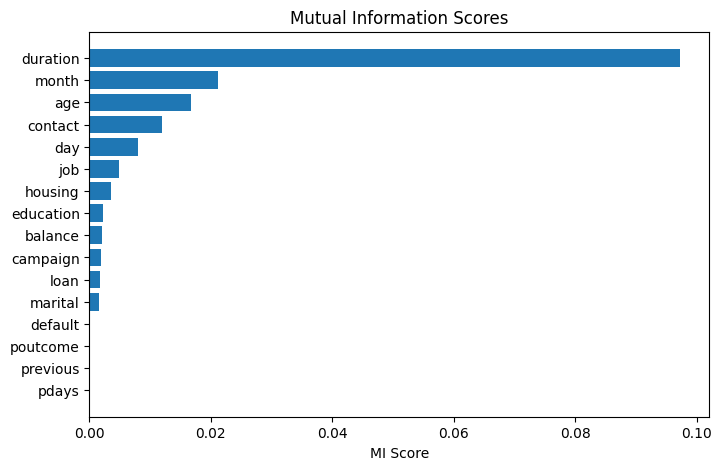

In [20]:
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")
    plt.xlabel("MI Score")  

plt.figure(dpi=100, figsize=(8, 5))
plot_mi_scores(mi_df.set_index('Feature')['MI Score'])
plt.show()  

**Top Informative Feature:**

Duration (MI Score: 0.0973): The most important feature is the duration of the last contact with the client. Longer calls likely indicate higher engagement, which influences the subscription decision.

**Moderately Informative Features:**

Month (0.0212): The month in which the campaign took place also provides some information, possibly due to seasonal effects on client behavior.
Age (0.0167): Age shows some predictive value, likely due to differing subscription rates across age groups.
Contact (0.0120): The method used to contact the client (e.g., cellular, telephone) provides moderate information.
Low Informative Features:

Day (0.0080), Job (0.0049), Housing (0.0035), Education (0.0023), and Balance (0.0020): These features offer low predictive power, meaning they contribute only marginally to predicting whether a client subscribes.
Negligible Informative Features:

Default (0.0000), Pdays (0.0000), Previous (0.0000), and Poutcome (0.0000): These features have no information gain in this dataset, suggesting that they do not help in predicting the subscription outcome.